In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties 

font = FontProperties(fname="/home/zhd/linux-fonts/simsun.ttc", size=20)
plt.rcParams['pdf.fonttype'] = 42

#label在图示(legend)中显示。若为数学公式，则最好在字符串前后添加"$"符号
#color：b:blue、g:green、r:red、c:cyan、m:magenta、y:yellow、k:black、w:white、、、
#线型：-  --   -.  :    ,
#marker：.  ,   o   v    <    *    +    1
#hatch: /, //, --, +, x, \\

color1 = tuple(x / 255 for x in [72, 68, 95])
color2 = tuple(x / 255 for x in [37, 130, 121])
color3 = tuple(x / 255 for x in [231, 175, 48])
color4 = tuple(x / 255 for x in [184, 2, 0])
color5 = tuple(x / 255 for x in [141, 87, 41])

In [39]:
# 分布式事务
# 参与者数量对吞吐量/延迟的影响
participants = np.array([1, 2, 3])
operations10_delay1_tps = np.array([1409.713, 448.020, 400.930])
operations10_delay1_txn_latency = np.array([6784.068, 21852.627, 24439.804]) / 1000
operations10_delay1_commit_latency = np.array([3504.532, 7332.197, 7599.489]) / 1000
operations10_delay1_rw_latency = np.array([3279.536, 14520.43, 16840.315]) / 1000

operations10_delay20_tps = np.array([167.603, 33.830, 30.220])
operations10_delay20_txn_latency = np.array([58719.350, 294498.312, 329532.705]) / 1000
operations10_delay20_commit_latency = np.array([55505.056, 121412.520, 121671.045]) / 1000

operations10_delay50_tps = np.array([70.160, 13.700, 12.260])
operations10_delay50_txn_latency = np.array([141744.652, 726094.698, 808979.967]) / 1000
operations10_delay50_commit_latency = np.array([138213.202, 303293.435, 303156.455]) / 1000

# 操作数量对吞吐量/延迟的影响
operations = np.array([10, 20, 30, 40, 50, 60])
participants2_delay1_tps = np.array([448.020, 274.510, 197.503, 154.280, 127.213, 107.300])
participants2_delay1_txn_latency = np.array([21852.627, 35829.455, 49903.104, 63998.242, 77990.485, 92656.006]) / 1000
participants2_delay1_commit_latency = np.array([7332.197, 7260.511, 7228.484, 7237.575, 7235.407, 7280.345]) / 1000
participants2_delay1_rw_latency = np.array([14520.43, 28568.944, 42674.62, 56760.667, 70755.078, 85375.661])

participants2_delay20_tps = np.array([33.830, 21.413, 15.523, 12.170, 10.123, 8.550])
participants2_delay20_txn_latency = np.array([294498.312, 466146.798, 642986.737, 819813.078, 985671.037, 1165032.370]) / 1000
participants2_delay20_commit_latency = np.array([121412.520, 121321.152, 121109.055, 121487.271, 121720.263, 121471.368]) / 1000

participants2_delay50_tps = np.array([13.700, 8.577, 0, 5.000, 4.107, 3.460])
participants2_delay50_txn_latency = np.array([726094.698, 1161488.184, 0, 1988718.459, 2423416.573, 2869003.081]) / 1000
participants2_delay50_commit_latency = np.array([303293.435, 302953.944, 0, 303682.379, 302651.178, 301678.582]) / 1000

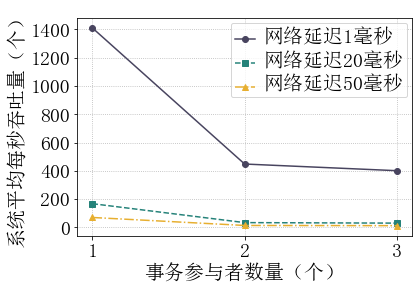

In [237]:
# x轴参与者数量，y轴吞吐量，图例网络延迟，折线图
plt.figure()
plt.grid(linestyle = ":") #设置背景网格线为虚线

x = np.array([1, 2, 3])
plt.plot(x, operations10_delay1_tps, linestyle="-", color=color1, marker="o", label="网络延迟1毫秒", linewidth=1.5)
plt.plot(x, operations10_delay20_tps, linestyle="--", color=color2, marker="s", label="网络延迟20毫秒", linewidth=1.5)
plt.plot(x, operations10_delay50_tps, linestyle="-.", color=color3, marker="^", label="网络延迟50毫秒", linewidth=1.5)

plt.xticks(x, fontproperties=font)
plt.yticks(fontproperties=font)
plt.xlabel("事务参与者数量（个）", fontproperties=font)
plt.ylabel("系统平均每秒吞吐量（个）", fontproperties=font)

plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontproperties=font)

plt.savefig("../result/participant-delay-tps.pdf", bbox_inches="tight")
plt.show()

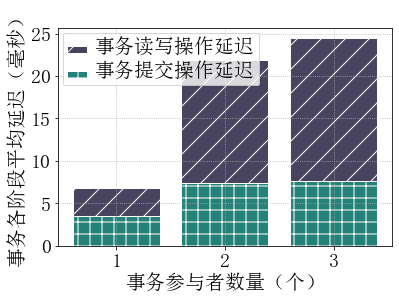

In [238]:
# x轴参与者数量，y轴延迟，堆叠柱状图，图例延迟类型
plt.figure()
plt.grid(linestyle = ":") #设置背景网格线为虚线

x = np.array([1, 2, 3])
bar_rw_latency = plt.bar(x, operations10_delay1_txn_latency, label="事务读写操作延迟", color=color1, edgecolor="white", hatch="/")
bar_commit_latency = plt.bar(x, operations10_delay1_commit_latency, label="事务提交操作延迟", color=color2, edgecolor="white", hatch="+")
plt.xticks(x, fontproperties=font)
plt.yticks(fontproperties=font)
plt.xlabel("事务参与者数量（个）", fontproperties=font)
plt.ylabel("事务各阶段平均延迟（毫秒）", fontproperties=font)

plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontproperties=font)

plt.savefig("../result/participant-stage-latency.pdf", bbox_inches="tight")
plt.show()

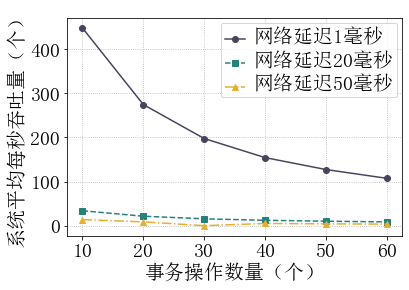

In [9]:
# x轴操作数量，y轴吞吐量，折线图，图例网络延迟
plt.figure()
plt.grid(linestyle = ":") #设置背景网格线为虚线

x = np.array([10, 20, 30, 40, 50, 60])
plt.plot(x, participants2_delay1_tps, linestyle="-", color=color1, marker="o", label="网络延迟1毫秒", linewidth=1.5)
plt.plot(x, participants2_delay20_tps, linestyle="--", color=color2, marker="s", label="网络延迟20毫秒", linewidth=1.5)
plt.plot(x, participants2_delay50_tps, linestyle="-.", color=color3, marker="^", label="网络延迟50毫秒", linewidth=1.5)

plt.xticks(x, fontproperties=font)
plt.yticks(fontproperties=font)
plt.xlabel("事务操作数量（个）", fontproperties=font)
plt.ylabel("系统平均每秒吞吐量（个）", fontproperties=font)

plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontproperties=font)

plt.savefig("../result/operation-delay-tps.pdf", bbox_inches="tight")
plt.show()

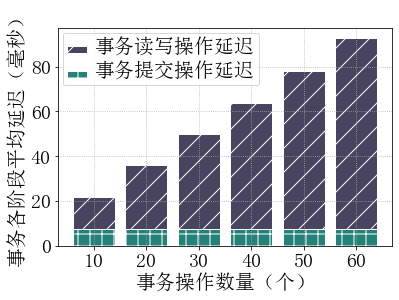

In [240]:
# x轴操作数量，y轴延迟，堆叠柱状图，图例延迟类型
plt.figure()
plt.grid(linestyle = ":") #设置背景网格线为虚线

x = np.array([1, 2, 3, 4, 5, 6])
x_label = np.array([10, 20, 30, 40, 50, 60])
bar_rw_latency = plt.bar(x, participants2_delay1_txn_latency, label="事务读写操作延迟", color=color1, edgecolor="white", hatch="/")
bar_commit_latency = plt.bar(x, participants2_delay1_commit_latency, label="事务提交操作延迟", color=color2, edgecolor="white", hatch="+")
plt.xticks(x, x_label, fontproperties=font)
plt.yticks(fontproperties=font)
plt.xlabel("事务操作数量（个）", fontproperties=font)
plt.ylabel("事务各阶段平均延迟（毫秒）", fontproperties=font)

plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontproperties=font)

plt.savefig("../result/operation-stage-latency.pdf", bbox_inches="tight")
plt.show()

In [2]:
# 冲突事务
# 是否使用elr/网络延迟对吞吐量的影响
delays = np.array([1, 20, 50])
concurrency10_operations10_elr_tps = np.array([1831.110, 409.020, 187.400])
concurrency10_operations10_elr_txn_latency = np.array([27983.022, 148688.003, 339809.920]) / 1000
concurrency10_operations10_elr_lock_latency = np.array([20671.850, 86925.635, 188917.475]) / 1000

concurrency10_operations10_noelr_tps = np.array([1321.993, 166.100, 71.167])
concurrency10_operations10_noelr_txn_latency = np.array([37658.749, 329506.138, 771365.919]) / 1000
concurrency10_operations10_noelr_lock_latency = np.array([30980.335, 269857.179, 629637.509]) / 1000

# 并发事务数量对平均延迟的影响
concurrencys = np.array([5, 10, 15, 20])
operations10_delay1_tps = np.array([1779.277, 1831.110, 1828.923, 1832.650])
operations10_delay1_txn_latency = np.array([16300.536, 27983.022, 40088.408, 52308.503]) / 1000
operations10_delay1_lock_latency = np.array([9183.031, 20671.850, 32615.451, 44579.999]) / 1000

operations10_delay20_tps = np.array([348.323, 409.020, 437.100, 456.530])
operations10_delay20_txn_latency = np.array([99351.838, 148688.003, 199036.923, 243919.582]) / 1000
operations10_delay20_lock_latency = np.array([38958.107, 86925.635, 135021.651, 179112.327]) / 1000

operations10_delay50_tps = np.array([156.880, 187.400, 201.900, 214.800])
operations10_delay50_txn_latency = np.array([231658.569, 339809.920, 445253.484, 538615.335]) / 1000
operations10_delay50_lock_latency = np.array([84819.254, 188917.475, 293962.751, 387560.068]) / 1000

# 操作数量对持锁时间的影响
operations = np.array([1, 10, 20, 30, 40])
concurrency10_delay1_tps = np.array([3648.167, 1831.110, 1150.140, 825.567, 655.953])
concurrency10_delay1_txn_latency = np.array([11445.872, 27983.022, 45827.928, 64542.822, 82351.594]) / 1000
concurrency10_delay1_lock_latency = np.array([7082.326, 20671.850, 35382.630, 50617.740, 64837.100]) / 1000

concurrency10_delay20_tps = np.array([454.177, 409.020, 362.627, 330.027, 301.663])
concurrency10_delay20_txn_latency = np.array([132098.326, 148688.003, 166219.377, 183437.637, 199621.693]) / 1000
concurrency10_delay20_lock_latency = np.array([74286.911, 86925.635, 101419.714, 114227.002, 127279.113]) / 1000

concurrency10_delay50_tps = np.array([198.333, 187.400, 177.667, 170.433, 160.867])
concurrency10_delay50_txn_latency = np.array([322852.472, 339809.920, 354614.368, 368875.382, 388423.067]) / 1000
concurrency10_delay50_lock_latency = np.array([176157.058, 188917.475, 202933.361, 213915.830, 230715.102]) / 1000

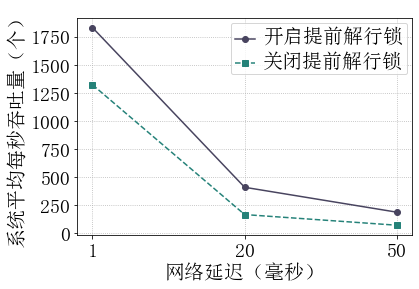

In [4]:
# x轴网络延迟，y轴吞吐量，折线图，图例是否使用elr
plt.figure()
plt.grid(linestyle = ":") #设置背景网格线为虚线

x = np.array([1, 2, 3])
x_label = np.array([1, 20, 50])
plt.plot(x, concurrency10_operations10_elr_tps, linestyle="-", color=color1, marker="o", label="开启提前解行锁", linewidth=1.5)
plt.plot(x, concurrency10_operations10_noelr_tps, linestyle="--", color=color2, marker="s", label="关闭提前解行锁", linewidth=1.5)

plt.xticks(x, x_label, fontproperties=font)
plt.xlabel("网络延迟（毫秒）", fontproperties=font)
plt.yticks(fontproperties=font)
plt.ylabel("系统平均每秒吞吐量（个）", fontproperties=font)

plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontproperties=font)

plt.savefig("../result/delay-elr-tps.pdf", bbox_inches="tight")
plt.show()

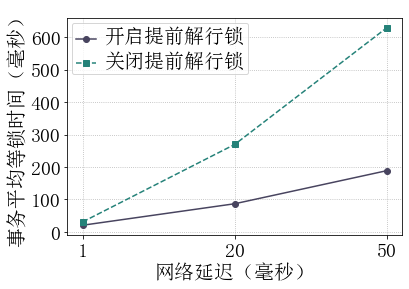

In [5]:
# x轴网络延迟，y轴等锁时间，折线图，图例是否使用elr
plt.figure()
plt.grid(linestyle = ":") #设置背景网格线为虚线

x = np.array([1, 2, 3])
x_label = np.array([1, 20, 50])
plt.plot(x, concurrency10_operations10_elr_lock_latency, linestyle="-", color=color1, marker="o", label="开启提前解行锁", linewidth=1.5)
plt.plot(x, concurrency10_operations10_noelr_lock_latency, linestyle="--", color=color2, marker="s", label="关闭提前解行锁", linewidth=1.5)

plt.xticks(x, x_label, fontproperties=font)
plt.xlabel("网络延迟（毫秒）", fontproperties=font)
plt.yticks(fontproperties=font)
plt.ylabel("事务平均等锁时间（毫秒）", fontproperties=font)

plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontproperties=font)

plt.savefig("../result/delay-elr-latency.pdf", bbox_inches="tight")
plt.show()

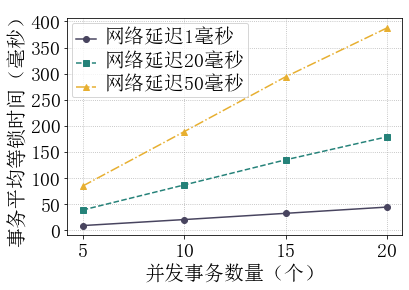

In [244]:
# x轴并发事务数量，y轴事务延迟，折线图，图例为网络延迟
plt.figure()
plt.grid(linestyle = ":") #设置背景网格线为虚线

x = np.array([1, 2, 3, 4])
x_label = np.array([5, 10, 15, 20])
plt.plot(x, operations10_delay1_lock_latency, linestyle="-", color=color1, marker="o", label="网络延迟1毫秒", linewidth=1.5)
plt.plot(x, operations10_delay20_lock_latency, linestyle="--", color=color2, marker="s", label="网络延迟20毫秒", linewidth=1.5)
plt.plot(x, operations10_delay50_lock_latency, linestyle="-.", color=color3, marker="^", label="网络延迟50毫秒", linewidth=1.5)

plt.xticks(x, x_label, fontproperties=font)
plt.yticks(fontproperties=font)
plt.xlabel("并发事务数量（个）", fontproperties=font)
plt.ylabel("事务平均等锁时间（毫秒）", fontproperties=font)

plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontproperties=font)

plt.savefig("../result/concurrency-delay-lock.pdf", bbox_inches="tight")
plt.show()

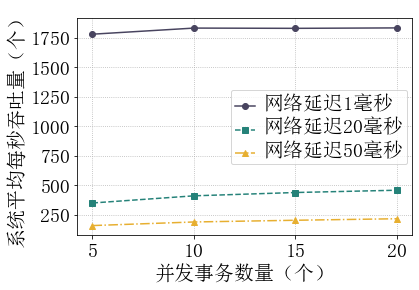

In [3]:
# x轴并发事务数量，y轴吞吐量，折线图，图例为网络延迟
plt.figure()
plt.grid(linestyle = ":") #设置背景网格线为虚线

x = np.array([1, 2, 3, 4])
x_label = np.array([5, 10, 15, 20])
plt.plot(x, operations10_delay1_tps, linestyle="-", color=color1, marker="o", label="网络延迟1毫秒", linewidth=1.5)
plt.plot(x, operations10_delay20_tps, linestyle="--", color=color2, marker="s", label="网络延迟20毫秒", linewidth=1.5)
plt.plot(x, operations10_delay50_tps, linestyle="-.", color=color3, marker="^", label="网络延迟50毫秒", linewidth=1.5)

plt.xticks(x, x_label, fontproperties=font)
plt.yticks(fontproperties=font)
plt.xlabel("并发事务数量（个）", fontproperties=font)
plt.ylabel("系统平均每秒吞吐量（个）", fontproperties=font)

plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontproperties=font)

plt.savefig("../result/concurrency-delay-tps.pdf", bbox_inches="tight")
plt.show()

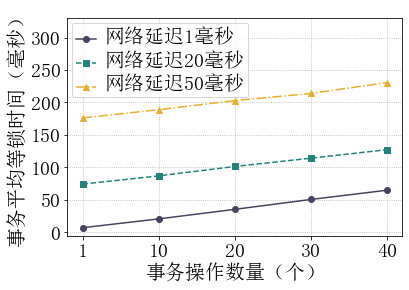

In [259]:
# x轴事务操作数量，y轴事务延迟，折线图，图例为网络延迟
plt.figure()
plt.grid(linestyle = ":") #设置背景网格线为虚线

x = np.array([1, 2, 3, 4, 5])
x_label = np.array([1, 10, 20, 30, 40])
plt.plot(x, concurrency10_delay1_lock_latency, linestyle="-", color=color1, marker="o", label="网络延迟1毫秒", linewidth=1.5)
plt.plot(x, concurrency10_delay20_lock_latency, linestyle="--", color=color2, marker="s", label="网络延迟20毫秒", linewidth=1.5)
plt.plot(x, concurrency10_delay50_lock_latency, linestyle="-.", color=color3, marker="^", label="网络延迟50毫秒", linewidth=1.5)

plt.xticks(x, x_label, fontproperties=font)
plt.yticks(fontproperties=font)
plt.xlabel("事务操作数量（个）", fontproperties=font)
plt.ylabel("事务平均等锁时间（毫秒）", fontproperties=font)
plt.ylim(-5, 330)

plt.legend(loc="upper left", numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontproperties=font)

plt.savefig("../result/operation-delay-lock.pdf", bbox_inches="tight")
plt.show()

In [ ]:
# 操作数量30，网络延迟1毫秒的等锁时间CDF图

In [18]:
# 死锁事务 
# 死锁环路长度对检测时间/检测成功率的影响
concurrencys = np.array([12, 18, 24, 36, 48])
chains1_delay1_txn_latency = np.array([4028514.231, 5446545.898, 6563237.018, 7469835.332, 8373606.804]) / 1000
chains1_delay1_deadlock_latency = np.array([3694915.233, 4946649.025, 6305992.808, 7176702.642, 8250959.130]) / 1000
chains1_delay1_success = np.array([0.984, 0.966, 0.764, 0.743, 0.037]) * 100

# 死锁环路数量对检测时间/检测成功率的影响
chains = np.array([1, 2, 3, 4, 5])
concurrencys24_delay1_txn_latency = np.array([4028514.231, 4069991.790, 4216431.873, 4643444.261, 4729779.784]) / 1000
concurrencys24_delay1_deadlock_latency = np.array([3694915.233, 3736284.125, 3859242.510, 4238439.821, 4268020.403]) / 1000
concurrencys24_delay1_success = np.array([0.984, 0.975, 0.969, 0.872, 0.804]) * 100

In [4]:
# CDF图数据
chains = np.array([1, 2, 3, 4, 5])
chain1_value_ms = [3253.928  ,3264.66536,3275.40272,3286.14008,3296.87744,3307.6148 ,
 3318.35216,3329.08952,3339.82688,3350.56424,3361.3016 ,3372.03896,
 3382.77632,3393.51368,3404.25104,3414.9884 ,3425.72576,3436.46312,
 3447.20048,3457.93784,3468.6752 ,3479.41256,3490.14992,3500.88728,
 3511.62464,3522.362  ,3533.09936,3543.83672,3554.57408,3565.31144,
 3576.0488 ,3586.78616,3597.52352,3608.26088,3618.99824,3629.7356 ,
 3640.47296,3651.21032,3661.94768,3672.68504,3683.4224 ,3694.15976,
 3704.89712,3715.63448,3726.37184,3737.1092 ,3747.84656,3758.58392,
 3769.32128,3780.05864,3790.796  ,3801.53336,3812.27072,3823.00808,
 3833.74544,3844.4828 ,3855.22016,3865.95752,3876.69488,3887.43224,
 3898.1696 ,3908.90696,3919.64432,3930.38168,3941.11904,3951.8564 ,
 3962.59376,3973.33112,3984.06848,3994.80584,4005.5432 ,4016.28056,
 4027.01792,4037.75528,4048.49264,4059.23   ,4069.96736,4080.70472,
 4091.44208,4102.17944,4112.9168 ,4123.65416,4134.39152,4145.12888,
 4155.86624,4166.6036 ,4177.34096,4188.07832,4198.81568,4209.55304,
 4220.2904 ,4231.02776,4241.76512,4252.50248,4263.23984,4273.9772 ,
 4284.71456,4295.45192,4306.18928,4316.92664,4327.664  ,4338.40136,
 4349.13872,4359.87608,4370.61344,4381.3508 ,4392.08816,4402.82552,
 4413.56288,4424.30024,4435.0376 ,4445.77496,4456.51232,4467.24968,
 4477.98704,4488.7244 ,4499.46176,4510.19912,4520.93648,4531.67384,
 4542.4112 ,4553.14856,4563.88592,4574.62328,4585.36064,4596.098  ,
 4606.83536,4617.57272,4628.31008,4639.04744,4649.7848 ,4660.52216,
 4671.25952,4681.99688,4692.73424,4703.4716 ,4714.20896,4724.94632,
 4735.68368,4746.42104,4757.1584 ,4767.89576,4778.63312,4789.37048,
 4800.10784,4810.8452 ,4821.58256,4832.31992,4843.05728,4853.79464,
 4864.532  ,4875.26936,4886.00672,4896.74408,4907.48144,4918.2188 ,
 4928.95616,4939.69352,4950.43088,4961.16824,4971.9056 ,4982.64296,
 4993.38032,5004.11768,5014.85504,5025.5924 ,5036.32976,5047.06712,
 5057.80448,5068.54184,5079.2792 ,5090.01656,5100.75392,5111.49128,
 5122.22864,5132.966  ,5143.70336,5154.44072,5165.17808,5175.91544,
 5186.6528 ,5197.39016,5208.12752,5218.86488,5229.60224,5240.3396 ,
 5251.07696,5261.81432,5272.55168,5283.28904,5294.0264 ,5304.76376,
 5315.50112,5326.23848,5336.97584,5347.7132 ,5358.45056,5369.18792,
 5379.92528,5390.66264,5401.4    ,5412.13736,5422.87472,5433.61208,
 5444.34944,5455.0868 ,5465.82416,5476.56152,5487.29888,5498.03624,
 5508.7736 ,5519.51096,5530.24832,5540.98568,5551.72304]
chain1_cdf = [  0.1497006 ,  0.5988024 ,  0.74850299,  0.89820359,  0.89820359,
   1.04790419,  1.34730539,  1.64670659,  1.64670659,  1.94610778,
   2.39520958,  4.49101796,  6.43712575,  7.78443114,  8.53293413,
  10.92814371, 13.77245509, 16.16766467, 17.36526946, 18.86227545,
  21.40718563, 24.5508982 , 28.14371257, 30.68862275, 32.18562874,
  35.32934132, 39.67065868, 42.66467066, 45.50898204, 47.30538922,
  48.95209581, 50.5988024 , 52.54491018, 53.89221557, 54.79041916,
  55.83832335, 58.23353293, 60.32934132, 62.1257485 , 64.37125749,
  66.16766467, 67.81437126, 69.61077844, 70.65868263, 70.95808383,
  71.40718563, 71.85628743, 73.20359281, 73.80239521, 75.        ,
  75.89820359, 76.94610778, 78.44311377, 79.64071856, 79.94011976,
  80.08982036, 80.38922156, 80.83832335, 81.43712575, 82.78443114,
  83.53293413, 83.68263473, 84.73053892, 85.17964072, 85.77844311,
  85.77844311, 85.77844311, 85.92814371, 86.52694611, 87.1257485 ,
  87.5748503 , 88.17365269, 88.77245509, 88.92215569, 89.07185629,
  89.37125749, 89.52095808, 89.67065868, 89.82035928, 89.97005988,
  90.11976048, 90.56886228, 90.71856287, 91.31736527, 91.46706587,
  91.91616766, 92.06586826, 92.21556886, 92.21556886, 92.21556886,
  92.51497006, 92.81437126, 93.26347305, 93.56287425, 93.71257485,
  94.01197605, 94.01197605, 94.01197605, 94.01197605, 94.16167665,
  94.16167665, 94.31137725, 94.61077844, 94.76047904, 95.20958084,
  95.20958084, 95.35928144, 95.35928144, 95.35928144, 95.35928144,
  95.35928144, 95.35928144, 95.35928144, 95.50898204, 95.50898204,
  95.50898204, 95.50898204, 95.95808383, 95.95808383, 95.95808383,
  95.95808383, 95.95808383, 95.95808383, 95.95808383, 96.55688623,
  96.70658683, 96.70658683, 96.70658683, 96.70658683, 96.85628743,
  96.85628743, 97.00598802, 97.00598802, 97.00598802, 97.00598802,
  97.00598802, 97.15568862, 97.15568862, 97.15568862, 97.15568862,
  97.15568862, 97.15568862, 97.15568862, 97.15568862, 97.30538922,
  97.45508982, 97.45508982, 97.45508982, 97.60479042, 97.60479042,
  97.60479042, 97.60479042, 97.60479042, 97.60479042, 97.60479042,
  97.75449102, 97.75449102, 97.75449102, 97.75449102, 97.75449102,
  97.75449102, 97.75449102, 97.75449102, 97.75449102, 97.75449102,
  97.75449102, 97.90419162, 98.05389222, 98.05389222, 98.05389222,
  98.20359281, 98.20359281, 98.20359281, 98.20359281, 98.20359281,
  98.20359281, 98.20359281, 98.20359281, 98.20359281, 98.20359281,
  98.35329341, 98.35329341, 98.35329341, 98.35329341, 98.35329341,
  98.35329341, 98.35329341, 98.35329341, 98.35329341, 98.35329341,
  98.50299401, 98.65269461, 98.80239521, 98.80239521, 98.80239521,
  98.80239521, 98.80239521, 98.80239521, 98.80239521, 98.80239521,
  98.95209581, 98.95209581, 99.10179641, 99.10179641, 99.10179641,
  99.25149701, 99.25149701, 99.25149701, 99.4011976 , 99.5508982 ,
  99.7005988 , 99.8502994 , 99.8502994 , 99.8502994 ,100.        ]
chain2_value_ms = [3280.252   ,3290.399195,3300.54639 ,3310.693585,3320.84078 ,3330.987975,
 3341.13517 ,3351.282365,3361.42956 ,3371.576755,3381.72395 ,3391.871145,
 3402.01834 ,3412.165535,3422.31273 ,3432.459925,3442.60712 ,3452.754315,
 3462.90151 ,3473.048705,3483.1959  ,3493.343095,3503.49029 ,3513.637485,
 3523.78468 ,3533.931875,3544.07907 ,3554.226265,3564.37346 ,3574.520655,
 3584.66785 ,3594.815045,3604.96224 ,3615.109435,3625.25663 ,3635.403825,
 3645.55102 ,3655.698215,3665.84541 ,3675.992605,3686.1398  ,3696.286995,
 3706.43419 ,3716.581385,3726.72858 ,3736.875775,3747.02297 ,3757.170165,
 3767.31736 ,3777.464555,3787.61175 ,3797.758945,3807.90614 ,3818.053335,
 3828.20053 ,3838.347725,3848.49492 ,3858.642115,3868.78931 ,3878.936505,
 3889.0837  ,3899.230895,3909.37809 ,3919.525285,3929.67248 ,3939.819675,
 3949.96687 ,3960.114065,3970.26126 ,3980.408455,3990.55565 ,4000.702845,
 4010.85004 ,4020.997235,4031.14443 ,4041.291625,4051.43882 ,4061.586015,
 4071.73321 ,4081.880405,4092.0276  ,4102.174795,4112.32199 ,4122.469185,
 4132.61638 ,4142.763575,4152.91077 ,4163.057965,4173.20516 ,4183.352355,
 4193.49955 ,4203.646745,4213.79394 ,4223.941135,4234.08833 ,4244.235525,
 4254.38272 ,4264.529915,4274.67711 ,4284.824305,4294.9715  ,4305.118695,
 4315.26589 ,4325.413085,4335.56028 ,4345.707475,4355.85467 ,4366.001865,
 4376.14906 ,4386.296255,4396.44345 ,4406.590645,4416.73784 ,4426.885035,
 4437.03223 ,4447.179425,4457.32662 ,4467.473815,4477.62101 ,4487.768205,
 4497.9154  ,4508.062595,4518.20979 ,4528.356985,4538.50418 ,4548.651375,
 4558.79857 ,4568.945765,4579.09296 ,4589.240155,4599.38735 ,4609.534545,
 4619.68174 ,4629.828935,4639.97613 ,4650.123325,4660.27052 ,4670.417715,
 4680.56491 ,4690.712105,4700.8593  ,4711.006495,4721.15369 ,4731.300885,
 4741.44808 ,4751.595275,4761.74247 ,4771.889665,4782.03686 ,4792.184055,
 4802.33125 ,4812.478445,4822.62564 ,4832.772835,4842.92003 ,4853.067225,
 4863.21442 ,4873.361615,4883.50881 ,4893.656005,4903.8032  ,4913.950395,
 4924.09759 ,4934.244785,4944.39198 ,4954.539175,4964.68637 ,4974.833565,
 4984.98076 ,4995.127955,5005.27515 ,5015.422345,5025.56954 ,5035.716735,
 5045.86393 ,5056.011125,5066.15832 ,5076.305515,5086.45271 ,5096.599905,
 5106.7471  ,5116.894295,5127.04149 ,5137.188685,5147.33588 ,5157.483075,
 5167.63027 ,5177.777465,5187.92466 ,5198.071855,5208.21905 ,5218.366245,
 5228.51344 ,5238.660635,5248.80783 ,5258.955025,5269.10222 ,5279.249415,
 5289.39661 ,5299.543805,5309.691   ,5319.838195,5329.98539 ,5340.132585,
 5350.27978 ,5360.426975,5370.57417 ,5380.721365,5390.86856 ,5401.015755,
 5411.16295 ,5421.310145,5431.45734 ,5441.604535,5451.75173 ,5461.898925,
 5472.04612 ,5482.193315,5492.34051 ,5502.487705,5512.6349  ,5522.782095,
 5532.92929 ,5543.076485,5553.22368 ,5563.370875,5573.51807 ,5583.665265,
 5593.81246 ,5603.959655,5614.10685 ,5624.254045,5634.40124 ,5644.548435,
 5654.69563 ,5664.842825,5674.99002 ,5685.137215,5695.28441 ,5705.431605,
 5715.5788  ,5725.725995,5735.87319 ,5746.020385,5756.16758 ,5766.314775,
 5776.46197 ,5786.609165,5796.75636 ,5806.903555,5817.05075 ,5827.197945,
 5837.34514 ,5847.492335,5857.63953 ,5867.786725,5877.93392 ,5888.081115,
 5898.22831 ,5908.375505,5918.5227  ,5928.669895,5938.81709 ,5948.964285,
 5959.11148 ,5969.258675,5979.40587 ,5989.553065]
chain2_cdf = [7.98722045e-02,3.19488818e-01,6.38977636e-01,9.58466454e-01,
 1.51757188e+00,1.67731629e+00,2.31629393e+00,2.95527157e+00,
 3.75399361e+00,4.31309904e+00,5.35143770e+00,6.78913738e+00,
 8.22683706e+00,1.19009585e+01,1.43769968e+01,1.77316294e+01,
 2.04472843e+01,2.34824281e+01,2.65175719e+01,3.02715655e+01,
 3.29872204e+01,3.60223642e+01,3.96964856e+01,4.30511182e+01,
 4.69648562e+01,4.97603834e+01,5.24760383e+01,5.38338658e+01,
 5.53514377e+01,5.68690096e+01,5.88658147e+01,6.05431310e+01,
 6.20607029e+01,6.29392971e+01,6.38977636e+01,6.50958466e+01,
 6.59744409e+01,6.64536741e+01,6.70926518e+01,6.75718850e+01,
 6.82108626e+01,6.85303514e+01,6.91693291e+01,6.98083067e+01,
 7.03674121e+01,7.09265176e+01,7.14057508e+01,7.18051118e+01,
 7.19648562e+01,7.26038339e+01,7.29233227e+01,7.31629393e+01,
 7.33226837e+01,7.35623003e+01,7.38019169e+01,7.42811502e+01,
 7.46805112e+01,7.52396166e+01,7.57188498e+01,7.62779553e+01,
 7.64376997e+01,7.67571885e+01,7.73162939e+01,7.77156550e+01,
 7.81150160e+01,7.84345048e+01,7.85143770e+01,7.86741214e+01,
 7.89936102e+01,7.92332268e+01,7.95527157e+01,8.02715655e+01,
 8.03514377e+01,8.05910543e+01,8.09904153e+01,8.12300319e+01,
 8.14696486e+01,8.17092652e+01,8.18690096e+01,8.20287540e+01,
 8.21884984e+01,8.25079872e+01,8.29073482e+01,8.33865815e+01,
 8.35463259e+01,8.40255591e+01,8.43450479e+01,8.44249201e+01,
 8.46645367e+01,8.50638978e+01,8.50638978e+01,8.51437700e+01,
 8.51437700e+01,8.51437700e+01,8.53833866e+01,8.56230032e+01,
 8.60223642e+01,8.61022364e+01,8.62619808e+01,8.67412141e+01,
 8.69009585e+01,8.74600639e+01,8.76198083e+01,8.76198083e+01,
 8.76996805e+01,8.78594249e+01,8.82587859e+01,8.84984026e+01,
 8.86581470e+01,8.89776358e+01,8.92971246e+01,8.95367412e+01,
 8.96166134e+01,8.96964856e+01,8.97763578e+01,8.99361022e+01,
 9.01757188e+01,9.02555911e+01,9.04153355e+01,9.07348243e+01,
 9.09744409e+01,9.14536741e+01,9.16134185e+01,9.17731629e+01,
 9.18530351e+01,9.18530351e+01,9.22523962e+01,9.24121406e+01,
 9.26517572e+01,9.27316294e+01,9.32108626e+01,9.34504792e+01,
 9.36900958e+01,9.39297125e+01,9.42492013e+01,9.44888179e+01,
 9.44888179e+01,9.44888179e+01,9.46485623e+01,9.49680511e+01,
 9.52076677e+01,9.52076677e+01,9.52076677e+01,9.52875399e+01,
 9.55271565e+01,9.56869010e+01,9.57667732e+01,9.59265176e+01,
 9.60862620e+01,9.61661342e+01,9.61661342e+01,9.62460064e+01,
 9.64057508e+01,9.65654952e+01,9.65654952e+01,9.65654952e+01,
 9.65654952e+01,9.65654952e+01,9.66453674e+01,9.67252396e+01,
 9.68849840e+01,9.68849840e+01,9.68849840e+01,9.70447284e+01,
 9.70447284e+01,9.70447284e+01,9.71246006e+01,9.71246006e+01,
 9.72044728e+01,9.72044728e+01,9.72044728e+01,9.72044728e+01,
 9.72044728e+01,9.72044728e+01,9.72044728e+01,9.72843450e+01,
 9.72843450e+01,9.72843450e+01,9.72843450e+01,9.72843450e+01,
 9.72843450e+01,9.72843450e+01,9.72843450e+01,9.72843450e+01,
 9.72843450e+01,9.72843450e+01,9.75239617e+01,9.77635783e+01,
 9.78434505e+01,9.80830671e+01,9.80830671e+01,9.80830671e+01,
 9.81629393e+01,9.81629393e+01,9.81629393e+01,9.82428115e+01,
 9.84824281e+01,9.86421725e+01,9.87220447e+01,9.87220447e+01,
 9.88817891e+01,9.90415335e+01,9.90415335e+01,9.91214058e+01,
 9.91214058e+01,9.91214058e+01,9.91214058e+01,9.91214058e+01,
 9.92012780e+01,9.92012780e+01,9.92811502e+01,9.92811502e+01,
 9.92811502e+01,9.92811502e+01,9.92811502e+01,9.92811502e+01,
 9.92811502e+01,9.92811502e+01,9.93610224e+01,9.94408946e+01,
 9.96006390e+01,9.96006390e+01,9.96006390e+01,9.96006390e+01,
 9.96006390e+01,9.96805112e+01,9.96805112e+01,9.96805112e+01,
 9.96805112e+01,9.96805112e+01,9.96805112e+01,9.96805112e+01,
 9.96805112e+01,9.96805112e+01,9.96805112e+01,9.96805112e+01,
 9.96805112e+01,9.96805112e+01,9.96805112e+01,9.96805112e+01,
 9.96805112e+01,9.96805112e+01,9.96805112e+01,9.96805112e+01,
 9.96805112e+01,9.96805112e+01,9.96805112e+01,9.96805112e+01,
 9.96805112e+01,9.96805112e+01,9.96805112e+01,9.96805112e+01,
 9.96805112e+01,9.96805112e+01,9.96805112e+01,9.96805112e+01,
 9.97603834e+01,9.97603834e+01,9.97603834e+01,9.97603834e+01,
 9.97603834e+01,9.99201278e+01,9.99201278e+01,9.99201278e+01,
 9.99201278e+01,9.99201278e+01,9.99201278e+01,1.00000000e+02]
chain3_value_ms = [3266.26581 ,3276.543405,3286.821   ,3297.098595,3307.37619 ,3317.653785,
 3327.93138 ,3338.208975,3348.48657 ,3358.764165,3369.04176 ,3379.319355,
 3389.59695 ,3399.874545,3410.15214 ,3420.429735,3430.70733 ,3440.984925,
 3451.26252 ,3461.540115,3471.81771 ,3482.095305,3492.3729  ,3502.650495,
 3512.92809 ,3523.205685,3533.48328 ,3543.760875,3554.03847 ,3564.316065,
 3574.59366 ,3584.871255,3595.14885 ,3605.426445,3615.70404 ,3625.981635,
 3636.25923 ,3646.536825,3656.81442 ,3667.092015,3677.36961 ,3687.647205,
 3697.9248  ,3708.202395,3718.47999 ,3728.757585,3739.03518 ,3749.312775,
 3759.59037 ,3769.867965,3780.14556 ,3790.423155,3800.70075 ,3810.978345,
 3821.25594 ,3831.533535,3841.81113 ,3852.088725,3862.36632 ,3872.643915,
 3882.92151 ,3893.199105,3903.4767  ,3913.754295,3924.03189 ,3934.309485,
 3944.58708 ,3954.864675,3965.14227 ,3975.419865,3985.69746 ,3995.975055,
 4006.25265 ,4016.530245,4026.80784 ,4037.085435,4047.36303 ,4057.640625,
 4067.91822 ,4078.195815,4088.47341 ,4098.751005,4109.0286  ,4119.306195,
 4129.58379 ,4139.861385,4150.13898 ,4160.416575,4170.69417 ,4180.971765,
 4191.24936 ,4201.526955,4211.80455 ,4222.082145,4232.35974 ,4242.637335,
 4252.91493 ,4263.192525,4273.47012 ,4283.747715,4294.02531 ,4304.302905,
 4314.5805  ,4324.858095,4335.13569 ,4345.413285,4355.69088 ,4365.968475,
 4376.24607 ,4386.523665,4396.80126 ,4407.078855,4417.35645 ,4427.634045,
 4437.91164 ,4448.189235,4458.46683 ,4468.744425,4479.02202 ,4489.299615,
 4499.57721 ,4509.854805,4520.1324  ,4530.409995,4540.68759 ,4550.965185,
 4561.24278 ,4571.520375,4581.79797 ,4592.075565,4602.35316 ,4612.630755,
 4622.90835 ,4633.185945,4643.46354 ,4653.741135,4664.01873 ,4674.296325,
 4684.57392 ,4694.851515,4705.12911 ,4715.406705,4725.6843  ,4735.961895,
 4746.23949 ,4756.517085,4766.79468 ,4777.072275,4787.34987 ,4797.627465,
 4807.90506 ,4818.182655,4828.46025 ,4838.737845,4849.01544 ,4859.293035,
 4869.57063 ,4879.848225,4890.12582 ,4900.403415,4910.68101 ,4920.958605,
 4931.2362  ,4941.513795,4951.79139 ,4962.068985,4972.34658 ,4982.624175,
 4992.90177 ,5003.179365,5013.45696 ,5023.734555,5034.01215 ,5044.289745,
 5054.56734 ,5064.844935,5075.12253 ,5085.400125,5095.67772 ,5105.955315,
 5116.23291 ,5126.510505,5136.7881  ,5147.065695,5157.34329 ,5167.620885,
 5177.89848 ,5188.176075,5198.45367 ,5208.731265,5219.00886 ,5229.286455,
 5239.56405 ,5249.841645,5260.11924 ,5270.396835,5280.67443 ,5290.952025,
 5301.22962 ,5311.507215,5321.78481 ,5332.062405,5342.34    ,5352.617595,
 5362.89519 ,5373.172785,5383.45038 ,5393.727975,5404.00557 ,5414.283165,
 5424.56076 ,5434.838355,5445.11595 ,5455.393545,5465.67114 ,5475.948735,
 5486.22633 ,5496.503925,5506.78152 ,5517.059115,5527.33671 ,5537.614305,
 5547.8919  ,5558.169495,5568.44709 ,5578.724685,5589.00228 ,5599.279875,
 5609.55747 ,5619.835065,5630.11266 ,5640.390255,5650.66785 ,5660.945445,
 5671.22304 ,5681.500635,5691.77823 ,5702.055825,5712.33342 ,5722.611015,
 5732.88861 ,5743.166205,5753.4438  ,5763.721395,5773.99899 ,5784.276585,
 5794.55418 ,5804.831775,5815.10937 ,5825.386965,5835.66456 ,5845.942155,
 5856.21975 ,5866.497345,5876.77494 ,5887.052535,5897.33013 ,5907.607725,
 5917.88532 ,5928.162915,5938.44051 ,5948.718105,5958.9957  ,5969.273295,
 5979.55089 ,5989.828485,6000.10608 ,6010.383675,6020.66127 ,6030.938865,
 6041.21646 ,6051.494055,6061.77165 ,6072.049245,6082.32684 ,6092.604435,
 6102.88203 ,6113.159625,6123.43722 ,6133.714815,6143.99241 ,6154.270005,
 6164.5476  ,6174.825195,6185.10279 ,6195.380385,6205.65798 ,6215.935575,
 6226.21317 ,6236.490765,6246.76836 ,6257.045955,6267.32355 ]
chain3_cdf = [5.63380282e-02,5.63380282e-02,1.12676056e-01,3.38028169e-01,
 5.07042254e-01,6.19718310e-01,1.01408451e+00,1.46478873e+00,
 1.97183099e+00,2.19718310e+00,3.09859155e+00,4.61971831e+00,
 6.19718310e+00,7.60563380e+00,8.95774648e+00,1.12676056e+01,
 1.35211268e+01,1.62816901e+01,1.93239437e+01,2.23098592e+01,
 2.45070423e+01,2.76619718e+01,3.10985915e+01,3.44788732e+01,
 3.71830986e+01,3.94929577e+01,4.15211268e+01,4.44507042e+01,
 4.63098592e+01,4.80563380e+01,4.99718310e+01,5.16619718e+01,
 5.28450704e+01,5.43098592e+01,5.53239437e+01,5.61690141e+01,
 5.68450704e+01,5.74647887e+01,5.76901408e+01,5.84225352e+01,
 5.88732394e+01,5.94929577e+01,5.99436620e+01,6.04507042e+01,
 6.09014085e+01,6.12394366e+01,6.15774648e+01,6.18028169e+01,
 6.20281690e+01,6.24788732e+01,6.32112676e+01,6.34929577e+01,
 6.37746479e+01,6.41690141e+01,6.43380282e+01,6.46760563e+01,
 6.51267606e+01,6.54084507e+01,6.59154930e+01,6.60281690e+01,
 6.61408451e+01,6.65915493e+01,6.68169014e+01,6.68732394e+01,
 6.70422535e+01,6.73239437e+01,6.76619718e+01,6.78873239e+01,
 6.82253521e+01,6.83380282e+01,6.87887324e+01,6.90140845e+01,
 6.91267606e+01,6.92957746e+01,6.96901408e+01,6.99718310e+01,
 7.01971831e+01,7.05915493e+01,7.09859155e+01,7.12112676e+01,
 7.14929577e+01,7.18309859e+01,7.21126761e+01,7.22816901e+01,
 7.25070423e+01,7.27887324e+01,7.29014085e+01,7.32957746e+01,
 7.35211268e+01,7.39718310e+01,7.42535211e+01,7.43098592e+01,
 7.45915493e+01,7.48169014e+01,7.50422535e+01,7.52676056e+01,
 7.54366197e+01,7.56056338e+01,7.59436620e+01,7.61126761e+01,
 7.63380282e+01,7.66760563e+01,7.69014085e+01,7.74084507e+01,
 7.76901408e+01,7.83098592e+01,7.87042254e+01,7.89859155e+01,
 7.94929577e+01,7.98309859e+01,8.00563380e+01,8.06197183e+01,
 8.10140845e+01,8.12394366e+01,8.16901408e+01,8.19154930e+01,
 8.24788732e+01,8.28732394e+01,8.30985915e+01,8.34929577e+01,
 8.37183099e+01,8.38873239e+01,8.45070423e+01,8.50704225e+01,
 8.54084507e+01,8.59718310e+01,8.61971831e+01,8.64788732e+01,
 8.65352113e+01,8.68169014e+01,8.69295775e+01,8.71549296e+01,
 8.73802817e+01,8.80000000e+01,8.81690141e+01,8.85070423e+01,
 8.91830986e+01,8.95211268e+01,8.96901408e+01,8.98591549e+01,
 8.99718310e+01,9.02535211e+01,9.04225352e+01,9.09295775e+01,
 9.10985915e+01,9.12112676e+01,9.16056338e+01,9.18873239e+01,
 9.19436620e+01,9.24507042e+01,9.29577465e+01,9.31830986e+01,
 9.38028169e+01,9.40281690e+01,9.44225352e+01,9.45352113e+01,
 9.47042254e+01,9.48169014e+01,9.49295775e+01,9.49859155e+01,
 9.52676056e+01,9.52676056e+01,9.53802817e+01,9.55492958e+01,
 9.57183099e+01,9.58873239e+01,9.60563380e+01,9.60563380e+01,
 9.61690141e+01,9.62816901e+01,9.64507042e+01,9.66760563e+01,
 9.66760563e+01,9.66760563e+01,9.67323944e+01,9.67887324e+01,
 9.68450704e+01,9.68450704e+01,9.70704225e+01,9.71830986e+01,
 9.71830986e+01,9.72957746e+01,9.73521127e+01,9.74084507e+01,
 9.74084507e+01,9.74084507e+01,9.75774648e+01,9.76338028e+01,
 9.77464789e+01,9.78591549e+01,9.78591549e+01,9.79154930e+01,
 9.79154930e+01,9.79154930e+01,9.79718310e+01,9.79718310e+01,
 9.80281690e+01,9.80845070e+01,9.81408451e+01,9.81971831e+01,
 9.82535211e+01,9.84225352e+01,9.85352113e+01,9.85352113e+01,
 9.85915493e+01,9.87605634e+01,9.87605634e+01,9.88732394e+01,
 9.89295775e+01,9.89859155e+01,9.89859155e+01,9.89859155e+01,
 9.90422535e+01,9.90985915e+01,9.90985915e+01,9.90985915e+01,
 9.90985915e+01,9.92112676e+01,9.92112676e+01,9.92112676e+01,
 9.92112676e+01,9.92112676e+01,9.92112676e+01,9.92676056e+01,
 9.92676056e+01,9.92676056e+01,9.92676056e+01,9.92676056e+01,
 9.92676056e+01,9.92676056e+01,9.92676056e+01,9.92676056e+01,
 9.92676056e+01,9.93239437e+01,9.93239437e+01,9.93239437e+01,
 9.94366197e+01,9.94929577e+01,9.94929577e+01,9.95492958e+01,
 9.96056338e+01,9.96619718e+01,9.97183099e+01,9.97183099e+01,
 9.97183099e+01,9.97183099e+01,9.97746479e+01,9.97746479e+01,
 9.97746479e+01,9.98309859e+01,9.98309859e+01,9.98309859e+01,
 9.98309859e+01,9.98309859e+01,9.98309859e+01,9.98309859e+01,
 9.98309859e+01,9.98309859e+01,9.98309859e+01,9.98309859e+01,
 9.98309859e+01,9.98309859e+01,9.98309859e+01,9.98309859e+01,
 9.98309859e+01,9.98309859e+01,9.98309859e+01,9.98309859e+01,
 9.98873239e+01,9.98873239e+01,9.98873239e+01,9.98873239e+01,
 9.98873239e+01,9.98873239e+01,9.98873239e+01,9.98873239e+01,
 9.98873239e+01,9.98873239e+01,9.98873239e+01,9.99436620e+01,
 9.99436620e+01,9.99436620e+01,9.99436620e+01,9.99436620e+01,
 9.99436620e+01,9.99436620e+01,9.99436620e+01,9.99436620e+01,
 9.99436620e+01,9.99436620e+01,9.99436620e+01,9.99436620e+01,
 1.00000000e+02]
chain4_value_ms = [3281.404845,3309.93    ,3338.455155,3366.98031 ,3395.505465,3424.03062 ,
 3452.555775,3481.08093 ,3509.606085,3538.13124 ,3566.656395,3595.18155 ,
 3623.706705,3652.23186 ,3680.757015,3709.28217 ,3737.807325,3766.33248 ,
 3794.857635,3823.38279 ,3851.907945,3880.4331  ,3908.958255,3937.48341 ,
 3966.008565,3994.53372 ,4023.058875,4051.58403 ,4080.109185,4108.63434 ,
 4137.159495,4165.68465 ,4194.209805,4222.73496 ,4251.260115,4279.78527 ,
 4308.310425,4336.83558 ,4365.360735,4393.88589 ,4422.411045,4450.9362  ,
 4479.461355,4507.98651 ,4536.511665,4565.03682 ,4593.561975,4622.08713 ,
 4650.612285,4679.13744 ,4707.662595,4736.18775 ,4764.712905,4793.23806 ,
 4821.763215,4850.28837 ,4878.813525,4907.33868 ,4935.863835,4964.38899 ,
 4992.914145,5021.4393  ,5049.964455,5078.48961 ,5107.014765,5135.53992 ,
 5164.065075,5192.59023 ,5221.115385,5249.64054 ,5278.165695,5306.69085 ,
 5335.216005,5363.74116 ,5392.266315,5420.79147 ,5449.316625,5477.84178 ,
 5506.366935,5534.89209 ,5563.417245,5591.9424  ,5620.467555,5648.99271 ,
 5677.517865,5706.04302 ,5734.568175,5763.09333 ,5791.618485,5820.14364 ,
 5848.668795,5877.19395 ,5905.719105,5934.24426 ,5962.769415,5991.29457 ,
 6019.819725,6048.34488 ,6076.870035,6105.39519 ,6133.920345,6162.4455  ,
 6190.970655,6219.49581 ,6248.020965,6276.54612 ,6305.071275,6333.59643 ,
 6362.121585,6390.64674 ,6419.171895,6447.69705 ,6476.222205,6504.74736 ,
 6533.272515,6561.79767 ,6590.322825,6618.84798 ,6647.373135,6675.89829 ,
 6704.423445,6732.9486  ,6761.473755,6789.99891 ,6818.524065,6847.04922 ,
 6875.574375,6904.09953 ,6932.624685,6961.14984 ,6989.674995,7018.20015 ,
 7046.725305,7075.25046 ,7103.775615,7132.30077 ,7160.825925,7189.35108 ,
 7217.876235,7246.40139 ,7274.926545,7303.4517  ,7331.976855,7360.50201 ,
 7389.027165,7417.55232 ,7446.077475,7474.60263 ,7503.127785,7531.65294 ,
 7560.178095,7588.70325 ,7617.228405,7645.75356 ,7674.278715,7702.80387 ,
 7731.329025,7759.85418 ,7788.379335,7816.90449 ,7845.429645,7873.9548  ,
 7902.479955,7931.00511 ,7959.530265,7988.05542 ,8016.580575,8045.10573 ,
 8073.630885,8102.15604 ,8130.681195,8159.20635 ,8187.731505,8216.25666 ,
 8244.781815,8273.30697 ,8301.832125,8330.35728 ,8358.882435,8387.40759 ,
 8415.932745,8444.4579  ,8472.983055,8501.50821 ,8530.033365,8558.55852 ,
 8587.083675,8615.60883 ,8644.133985,8672.65914 ,8701.184295,8729.70945 ,
 8758.234605,8786.75976 ,8815.284915,8843.81007 ,8872.335225,8900.86038 ,
 8929.385535,8957.91069 ,8986.435845,9014.961   ,9043.486155,9072.01131 ,
 9100.536465,9129.06162 ,9157.586775,9186.11193 ,9214.637085,9243.16224 ,
 9271.687395,9300.21255 ,9328.737705,9357.26286 ,9385.788015,9414.31317 ,
 9442.838325,9471.36348 ,9499.888635,9528.41379 ,9556.938945,9585.4641  ,
 9613.989255,9642.51441 ,9671.039565,9699.56472 ,9728.089875,9756.61503 ,
 9785.140185,9813.66534 ,9842.190495,9870.71565 ,9899.240805]
chain4_cdf = [5.61797753e-02,1.68539326e-01,5.61797753e-01,1.40449438e+00,
 3.53932584e+00,7.02247191e+00,1.23033708e+01,1.82584270e+01,
 2.28651685e+01,2.72471910e+01,3.24719101e+01,3.60674157e+01,
 3.80898876e+01,3.95505618e+01,4.10674157e+01,4.17977528e+01,
 4.25842697e+01,4.37640449e+01,4.43258427e+01,4.50561798e+01,
 4.65730337e+01,4.74719101e+01,4.84831461e+01,4.92134831e+01,
 5.03932584e+01,5.10674157e+01,5.18539326e+01,5.26404494e+01,
 5.34831461e+01,5.44382022e+01,5.52247191e+01,5.67415730e+01,
 5.79775281e+01,5.89325843e+01,6.03370787e+01,6.14044944e+01,
 6.35955056e+01,6.54494382e+01,6.79213483e+01,6.98314607e+01,
 7.18539326e+01,7.33707865e+01,7.56179775e+01,7.69101124e+01,
 7.84269663e+01,8.01123596e+01,8.16292135e+01,8.27528090e+01,
 8.38202247e+01,8.52247191e+01,8.62359551e+01,8.68539326e+01,
 8.74719101e+01,8.78651685e+01,8.84831461e+01,8.87640449e+01,
 8.91011236e+01,8.92696629e+01,8.96067416e+01,8.96067416e+01,
 8.98314607e+01,9.06179775e+01,9.10112360e+01,9.16853933e+01,
 9.19662921e+01,9.24719101e+01,9.26404494e+01,9.26966292e+01,
 9.27528090e+01,9.28651685e+01,9.29775281e+01,9.30337079e+01,
 9.31460674e+01,9.32022472e+01,9.32584270e+01,9.33146067e+01,
 9.34831461e+01,9.36516854e+01,9.38764045e+01,9.38764045e+01,
 9.38764045e+01,9.38764045e+01,9.39325843e+01,9.39325843e+01,
 9.39325843e+01,9.39887640e+01,9.40449438e+01,9.40449438e+01,
 9.40449438e+01,9.40449438e+01,9.41573034e+01,9.42696629e+01,
 9.44382022e+01,9.44943820e+01,9.46067416e+01,9.47191011e+01,
 9.48314607e+01,9.48876404e+01,9.48876404e+01,9.48876404e+01,
 9.48876404e+01,9.49438202e+01,9.50000000e+01,9.50000000e+01,
 9.50000000e+01,9.50000000e+01,9.50000000e+01,9.50000000e+01,
 9.50000000e+01,9.50000000e+01,9.50561798e+01,9.50561798e+01,
 9.50561798e+01,9.50561798e+01,9.51123596e+01,9.51123596e+01,
 9.51123596e+01,9.51123596e+01,9.51123596e+01,9.51123596e+01,
 9.51123596e+01,9.51123596e+01,9.51123596e+01,9.51123596e+01,
 9.51123596e+01,9.51123596e+01,9.51123596e+01,9.51123596e+01,
 9.51123596e+01,9.51123596e+01,9.51123596e+01,9.51123596e+01,
 9.51123596e+01,9.51123596e+01,9.51123596e+01,9.51123596e+01,
 9.51123596e+01,9.51123596e+01,9.51123596e+01,9.51123596e+01,
 9.51123596e+01,9.51123596e+01,9.51123596e+01,9.51123596e+01,
 9.51685393e+01,9.51685393e+01,9.51685393e+01,9.51685393e+01,
 9.51685393e+01,9.51685393e+01,9.52247191e+01,9.52808989e+01,
 9.53370787e+01,9.53932584e+01,9.53932584e+01,9.53932584e+01,
 9.54494382e+01,9.55617978e+01,9.55617978e+01,9.56741573e+01,
 9.57303371e+01,9.57865169e+01,9.58426966e+01,9.59550562e+01,
 9.60674157e+01,9.60674157e+01,9.60674157e+01,9.61797753e+01,
 9.61797753e+01,9.62359551e+01,9.62921348e+01,9.64044944e+01,
 9.64044944e+01,9.64044944e+01,9.64044944e+01,9.64606742e+01,
 9.65168539e+01,9.65168539e+01,9.65730337e+01,9.66292135e+01,
 9.66853933e+01,9.68539326e+01,9.68539326e+01,9.69662921e+01,
 9.70786517e+01,9.70786517e+01,9.71348315e+01,9.71910112e+01,
 9.73033708e+01,9.74157303e+01,9.74157303e+01,9.75842697e+01,
 9.76966292e+01,9.76966292e+01,9.78089888e+01,9.79213483e+01,
 9.79775281e+01,9.80337079e+01,9.81460674e+01,9.82022472e+01,
 9.82584270e+01,9.84269663e+01,9.84831461e+01,9.86516854e+01,
 9.87078652e+01,9.88202247e+01,9.89325843e+01,9.91011236e+01,
 9.91573034e+01,9.92134831e+01,9.92134831e+01,9.93258427e+01,
 9.93820225e+01,9.94382022e+01,9.94943820e+01,9.95505618e+01,
 9.95505618e+01,9.95505618e+01,9.96067416e+01,9.96067416e+01,
 9.96629213e+01,9.96629213e+01,9.96629213e+01,9.97191011e+01,
 9.97191011e+01,9.97752809e+01,9.97752809e+01,9.98314607e+01,
 9.98876404e+01,9.99438202e+01,9.99438202e+01,9.99438202e+01,
 1.00000000e+02]
chain5_value_ms = [ 3289.118  , 3317.32726, 3345.53652, 3373.74578, 3401.95504, 3430.1643 ,
  3458.37356, 3486.58282, 3514.79208, 3543.00134, 3571.2106 , 3599.41986,
  3627.62912, 3655.83838, 3684.04764, 3712.2569 , 3740.46616, 3768.67542,
  3796.88468, 3825.09394, 3853.3032 , 3881.51246, 3909.72172, 3937.93098,
  3966.14024, 3994.3495 , 4022.55876, 4050.76802, 4078.97728, 4107.18654,
  4135.3958 , 4163.60506, 4191.81432, 4220.02358, 4248.23284, 4276.4421 ,
  4304.65136, 4332.86062, 4361.06988, 4389.27914, 4417.4884 , 4445.69766,
  4473.90692, 4502.11618, 4530.32544, 4558.5347 , 4586.74396, 4614.95322,
  4643.16248, 4671.37174, 4699.581  , 4727.79026, 4755.99952, 4784.20878,
  4812.41804, 4840.6273 , 4868.83656, 4897.04582, 4925.25508, 4953.46434,
  4981.6736 , 5009.88286, 5038.09212, 5066.30138, 5094.51064, 5122.7199 ,
  5150.92916, 5179.13842, 5207.34768, 5235.55694, 5263.7662 , 5291.97546,
  5320.18472, 5348.39398, 5376.60324, 5404.8125 , 5433.02176, 5461.23102,
  5489.44028, 5517.64954, 5545.8588 , 5574.06806, 5602.27732, 5630.48658,
  5658.69584, 5686.9051 , 5715.11436, 5743.32362, 5771.53288, 5799.74214,
  5827.9514 , 5856.16066, 5884.36992, 5912.57918, 5940.78844, 5968.9977 ,
  5997.20696, 6025.41622, 6053.62548, 6081.83474, 6110.044  , 6138.25326,
  6166.46252, 6194.67178, 6222.88104, 6251.0903 , 6279.29956, 6307.50882,
  6335.71808, 6363.92734, 6392.1366 , 6420.34586, 6448.55512, 6476.76438,
  6504.97364, 6533.1829 , 6561.39216, 6589.60142, 6617.81068, 6646.01994,
  6674.2292 , 6702.43846, 6730.64772, 6758.85698, 6787.06624, 6815.2755 ,
  6843.48476, 6871.69402, 6899.90328, 6928.11254, 6956.3218 , 6984.53106,
  7012.74032, 7040.94958, 7069.15884, 7097.3681 , 7125.57736, 7153.78662,
  7181.99588, 7210.20514, 7238.4144 , 7266.62366, 7294.83292, 7323.04218,
  7351.25144, 7379.4607 , 7407.66996, 7435.87922, 7464.08848, 7492.29774,
  7520.507  , 7548.71626, 7576.92552, 7605.13478, 7633.34404, 7661.5533 ,
  7689.76256, 7717.97182, 7746.18108, 7774.39034, 7802.5996 , 7830.80886,
  7859.01812, 7887.22738, 7915.43664, 7943.6459 , 7971.85516, 8000.06442,
  8028.27368, 8056.48294, 8084.6922 , 8112.90146, 8141.11072, 8169.31998,
  8197.52924, 8225.7385 , 8253.94776, 8282.15702, 8310.36628, 8338.57554,
  8366.7848 , 8394.99406, 8423.20332, 8451.41258, 8479.62184, 8507.8311 ,
  8536.04036, 8564.24962, 8592.45888, 8620.66814, 8648.8774 , 8677.08666,
  8705.29592, 8733.50518, 8761.71444, 8789.9237 , 8818.13296, 8846.34222,
  8874.55148, 8902.76074, 8930.97   , 8959.17926, 8987.38852, 9015.59778,
  9043.80704, 9072.0163 , 9100.22556, 9128.43482, 9156.64408, 9184.85334,
  9213.0626 , 9241.27186, 9269.48112, 9297.69038, 9325.89964, 9354.1089 ,
  9382.31816, 9410.52742, 9438.73668, 9466.94594, 9495.1552 , 9523.36446,
  9551.57372, 9579.78298, 9607.99224, 9636.2015 , 9664.41076, 9692.62002,
  9720.82928, 9749.03854, 9777.2478 , 9805.45706, 9833.66632, 9861.87558,
  9890.08484, 9918.2941 , 9946.50336, 9974.71262,10002.92188,10031.13114]
chain5_cdf = [9.70873786e-02,3.88349515e-01,1.16504854e+00,2.08737864e+00,
 3.83495146e+00,7.28155340e+00,1.12621359e+01,1.45631068e+01,
 1.78640777e+01,2.17475728e+01,2.41747573e+01,2.66019417e+01,
 2.86407767e+01,3.02912621e+01,3.21844660e+01,3.32524272e+01,
 3.40291262e+01,3.47572816e+01,3.57281553e+01,3.66504854e+01,
 3.79126214e+01,3.86407767e+01,3.93203883e+01,4.01456311e+01,
 4.12621359e+01,4.24271845e+01,4.38834951e+01,4.52912621e+01,
 4.62135922e+01,4.80097087e+01,5.01941748e+01,5.23300971e+01,
 5.43689320e+01,5.59708738e+01,5.86407767e+01,6.09708738e+01,
 6.31553398e+01,6.55825243e+01,6.77184466e+01,6.95631068e+01,
 7.16504854e+01,7.34951456e+01,7.50970874e+01,7.70388350e+01,
 7.90776699e+01,8.11650485e+01,8.33495146e+01,8.48543689e+01,
 8.58252427e+01,8.68446602e+01,8.76699029e+01,8.82524272e+01,
 8.88349515e+01,8.94660194e+01,9.01456311e+01,9.06310680e+01,
 9.10679612e+01,9.11650485e+01,9.12135922e+01,9.15533981e+01,
 9.18446602e+01,9.21359223e+01,9.21844660e+01,9.23786408e+01,
 9.24271845e+01,9.24757282e+01,9.24757282e+01,9.25242718e+01,
 9.25242718e+01,9.25242718e+01,9.26213592e+01,9.26213592e+01,
 9.27184466e+01,9.29126214e+01,9.30582524e+01,9.32038835e+01,
 9.34466019e+01,9.34951456e+01,9.35436893e+01,9.36893204e+01,
 9.37378641e+01,9.37378641e+01,9.38834951e+01,9.39805825e+01,
 9.40291262e+01,9.42233010e+01,9.44174757e+01,9.45145631e+01,
 9.47087379e+01,9.48058252e+01,9.49029126e+01,9.50485437e+01,
 9.52427184e+01,9.52427184e+01,9.52912621e+01,9.53398058e+01,
 9.55339806e+01,9.55825243e+01,9.55825243e+01,9.56310680e+01,
 9.57281553e+01,9.57281553e+01,9.57281553e+01,9.57766990e+01,
 9.57766990e+01,9.57766990e+01,9.57766990e+01,9.57766990e+01,
 9.57766990e+01,9.58252427e+01,9.58252427e+01,9.58252427e+01,
 9.58252427e+01,9.58252427e+01,9.58252427e+01,9.58252427e+01,
 9.58252427e+01,9.58252427e+01,9.58252427e+01,9.58737864e+01,
 9.58737864e+01,9.58737864e+01,9.58737864e+01,9.58737864e+01,
 9.58737864e+01,9.58737864e+01,9.58737864e+01,9.58737864e+01,
 9.58737864e+01,9.58737864e+01,9.58737864e+01,9.58737864e+01,
 9.58737864e+01,9.59223301e+01,9.59223301e+01,9.59223301e+01,
 9.59223301e+01,9.59708738e+01,9.59708738e+01,9.59708738e+01,
 9.59708738e+01,9.59708738e+01,9.59708738e+01,9.59708738e+01,
 9.59708738e+01,9.60194175e+01,9.60194175e+01,9.60194175e+01,
 9.60679612e+01,9.60679612e+01,9.61165049e+01,9.61165049e+01,
 9.61165049e+01,9.61650485e+01,9.61650485e+01,9.62621359e+01,
 9.62621359e+01,9.63106796e+01,9.64077670e+01,9.64563107e+01,
 9.64563107e+01,9.64563107e+01,9.65048544e+01,9.65048544e+01,
 9.65048544e+01,9.65048544e+01,9.65048544e+01,9.66019417e+01,
 9.66019417e+01,9.66019417e+01,9.66504854e+01,9.66504854e+01,
 9.66504854e+01,9.66504854e+01,9.66990291e+01,9.66990291e+01,
 9.67475728e+01,9.67475728e+01,9.67475728e+01,9.68446602e+01,
 9.69417476e+01,9.69417476e+01,9.69902913e+01,9.70388350e+01,
 9.71359223e+01,9.71844660e+01,9.72815534e+01,9.74757282e+01,
 9.74757282e+01,9.75728155e+01,9.77184466e+01,9.78155340e+01,
 9.78155340e+01,9.79611650e+01,9.80097087e+01,9.81067961e+01,
 9.82038835e+01,9.82524272e+01,9.83980583e+01,9.84951456e+01,
 9.85922330e+01,9.86407767e+01,9.87864078e+01,9.88834951e+01,
 9.89320388e+01,9.89320388e+01,9.89320388e+01,9.89805825e+01,
 9.89805825e+01,9.90291262e+01,9.90291262e+01,9.90291262e+01,
 9.90291262e+01,9.90291262e+01,9.90291262e+01,9.90776699e+01,
 9.90776699e+01,9.91747573e+01,9.91747573e+01,9.91747573e+01,
 9.91747573e+01,9.91747573e+01,9.92233010e+01,9.92718447e+01,
 9.92718447e+01,9.94660194e+01,9.94660194e+01,9.95145631e+01,
 9.95631068e+01,9.96116505e+01,9.96601942e+01,9.97087379e+01,
 9.97572816e+01,9.97572816e+01,9.98058252e+01,9.98058252e+01,
 9.99029126e+01,9.99029126e+01,9.99514563e+01,1.00000000e+02]


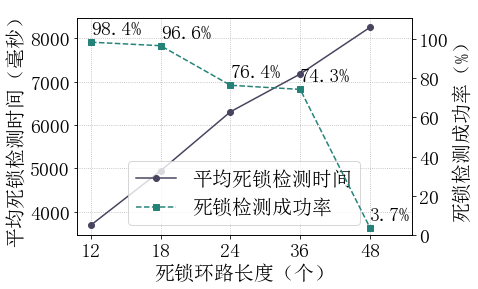

In [35]:
# x轴并发事务数量，y轴死锁检测时间/成功率，折线图，图例为不同指标
plt.figure()
plt.grid(linestyle = ":") #设置背景网格线为虚线
ax1 = plt.gca()

x = np.array([1, 2, 3, 4, 5])
x_label = np.array([12, 18, 24, 36, 48])
ax1.plot(x, chains1_delay1_deadlock_latency, linestyle="-", color=color1, marker="o", label="平均死锁检测时间", linewidth=1.5)
ax1.set_xlabel("死锁环路长度（个）", fontproperties=font)
ax1.set_ylabel("平均死锁检测时间（毫秒）", fontproperties=font)
for label in ax1.get_yticklabels():
    label.set_fontproperties(font)
for label in ax1.get_xticklabels():
    label.set_fontproperties(font)

ax2 = ax1.twinx()
ax2.plot(x, chains1_delay1_success, linestyle="--", color=color2, marker="s", label="死锁检测成功率", linewidth=1.5)
ax2.set_ylabel("死锁检测成功率（%）", fontproperties=font)
for i, j in zip(x, chains1_delay1_success):
    ax2.annotate('{:.1f}%'.format(j), (i, j), textcoords="offset points", xytext=(0,5), ha="left", va="bottom", fontproperties=font)
ax2.set_xlim(0.8, 5.6)
ax2.set_ylim(0, 111)
for label in ax2.get_yticklabels():
    label.set_fontproperties(font)

plt.xticks(x, x_label, fontproperties=font)
line1, label1 = ax1.get_legend_handles_labels()
line2, label2 = ax2.get_legend_handles_labels()
ax1.legend(line1 + line2, label1 + label2, loc='lower center', prop=font)

plt.savefig("../result/cyclelength-deadlock-metric.pdf", bbox_inches="tight")
plt.show()

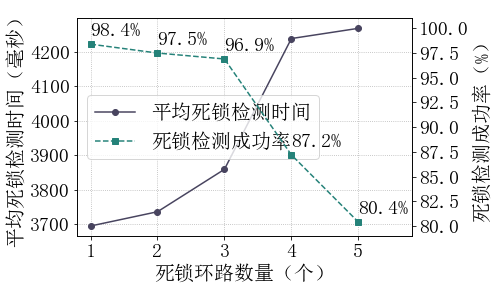

In [81]:

# x轴并发事务数量，y轴死锁检测时间/成功率，折线图，图例为不同指标
plt.figure()
plt.grid(linestyle = ":") #设置背景网格线为虚线
ax1 = plt.gca()

x = np.array([1, 2, 3, 4, 5])
ax1.plot(x, concurrencys24_delay1_deadlock_latency, linestyle="-", color=color1, marker="o", label="平均死锁检测时间", linewidth=1.5)
ax1.set_ylabel("平均死锁检测时间（毫秒）", fontproperties=font)
ax1.set_xlabel("死锁环路数量（个）", fontproperties=font)
for label in ax1.get_yticklabels():
    label.set_fontproperties(font)
for label in ax1.get_xticklabels():
    label.set_font_properties(font)
    
ax2 = ax1.twinx()
ax2.plot(x, concurrencys24_delay1_success, linestyle="--", color=color2, marker="s", label="死锁检测成功率", linewidth=1.5)
ax2.set_ylabel("死锁检测成功率（%）", fontproperties=font)
for i, j in zip(x, concurrencys24_delay1_success):
    ax2.annotate('{:.1f}%'.format(j), (i, j), textcoords="offset points", xytext=(0,5), ha="left", va="bottom", fontproperties=font)
ax2.set_xlim(0.8, 5.8)
ax2.set_ylim(79, 101)
for label in ax2.get_yticklabels():
    label.set_fontproperties(font)

line1, label1 = ax1.get_legend_handles_labels()
line2, label2 = ax2.get_legend_handles_labels()
ax1.legend(line1 + line2, label1 + label2, loc='center left', prop=font)

plt.savefig("../result/chain-deadlock-metric.pdf", bbox_inches="tight")
plt.show()

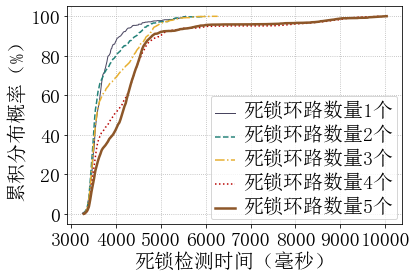

In [16]:
# x轴事务操作数量，y轴事务延迟，折线图，图例为网络延迟
plt.figure()
plt.grid(linestyle = ":") #设置背景网格线为虚线

plt.plot(chain1_value_ms, chain1_cdf, linestyle="-", color=color1, label="死锁环路数量1个", linewidth=1)
plt.plot(chain2_value_ms, chain2_cdf, linestyle="--", color=color2, label="死锁环路数量2个", linewidth=1.5)
plt.plot(chain3_value_ms, chain3_cdf, linestyle="-.", color=color3, label="死锁环路数量3个", linewidth=1.5)
plt.plot(chain4_value_ms, chain4_cdf, linestyle=":", color=color4, label="死锁环路数量4个", linewidth=1.5)
plt.plot(chain5_value_ms, chain5_cdf, linestyle="-", color=color5, label="死锁环路数量5个", linewidth=2.5)

plt.xticks(fontproperties=font)
plt.yticks(fontproperties=font)
plt.xlabel("死锁检测时间（毫秒）", fontproperties=font)
plt.ylabel("累积分布概率（%）", fontproperties=font)

plt.legend(loc="lower right", numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontproperties=font)

plt.savefig("../result/chain-deadlock-cdf.pdf", bbox_inches="tight")
plt.show()

In [41]:
# 并发事务
# 网络延迟对本地事务事务开启/读写操作的影响
delays = np.array([1, 20, 50])
participants1_operations10_tps = np.array([1409.713, 167.603, 70.160])
participants1_operations10_txn_latency = np.array([6784.068, 58719.350, 141744.652]) / 1000
participants1_operations10_commit_latency = np.array([3504.532, 55505.056, 138213.202]) / 1000

# 读写操作比例的影响
readonlys = np.array([0, 20, 40, 60, 80, 100])
operations20_tps = np.array([2631.893, 2642.030, 2701.720, 3125.930, 3855.960, 5253.110])
operations20_txn_latency = np.array([16527.952, 13826.335, 11666.299, 9657.541, 7895.451, 6686.944]) / 1000
operations20_commit_latency = np.array([4941.646, 3462.890, 2504.390, 1674.932, 918.936, 203.460]) / 1000

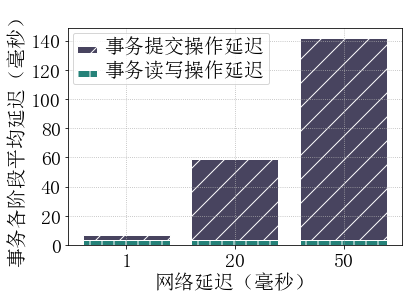

In [44]:
# x轴网络延迟，y轴事务延迟，堆叠柱状图，图例延迟类型
plt.figure()
plt.grid(linestyle = ":") #设置背景网格线为虚线

x = np.array([1, 2, 3])
x_label = np.array([1, 20, 50])
participants1_operations10_rw_latency = participants1_operations10_txn_latency - participants1_operations10_commit_latency
bar_txn_latency = plt.bar(x, participants1_operations10_txn_latency, label="事务提交操作延迟", color=color1, edgecolor="white", hatch="/")
bar_rw_latency = plt.bar(x, participants1_operations10_rw_latency, label="事务读写操作延迟", color=color2, edgecolor="white", hatch="+")
plt.xticks(x, x_label, fontproperties=font)
plt.yticks(fontproperties=font)
plt.xlabel("网络延迟（毫秒）", fontproperties=font)
plt.ylabel("事务各阶段平均延迟（毫秒）", fontproperties=font)

plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontproperties=font)

plt.savefig("../result/delay-stage-latency.pdf", bbox_inches="tight")
plt.show()

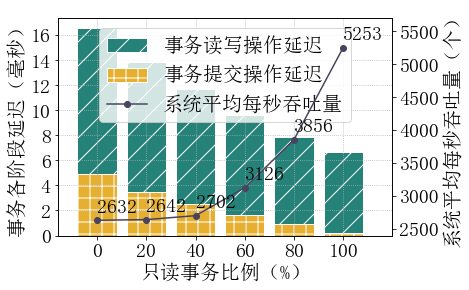

In [53]:
# x轴只读事务比例，y轴吞吐量/事务延迟，折线图/堆叠直方图，图例为不同指标
plt.figure()
plt.grid(linestyle = ":") #设置背景网格线为虚线
ax1 = plt.gca()

x = np.array([1, 2, 3, 4, 5, 6])
x_label = np.array([0, 20, 40, 60, 80, 100])
bar_txn_latency = ax1.bar(x, operations20_txn_latency, label="事务读写操作延迟", color=color2, edgecolor="white", hatch="/")
bar_rw_latency = ax1.bar(x, operations20_commit_latency, label="事务提交操作延迟", color=color3, edgecolor="white", hatch="+")
ax1.set_ylabel("事务各阶段延迟（毫秒）", fontproperties=font)
ax1.set_xlabel("只读事务比例（%）", fontproperties=font)
for label in ax1.get_yticklabels():
    label.set_fontproperties(font)
for label in ax1.get_xticklabels():
    label.set_font_properties(font)

ax2 = ax1.twinx()
ax2.plot(x, operations20_tps, linestyle="-", color=color1, marker="o", label="系统平均每秒吞吐量", linewidth=1.5)
ax2.set_ylabel("系统平均每秒吞吐量（个）", fontproperties=font)
for i, j in zip(x, operations20_tps):
    ax2.annotate('{:.0f}'.format(j), (i, j), textcoords="offset points", xytext=(0,5), ha="left", va="bottom", fontproperties=font)
ax2.set_xlim(0.2, 7)
ax2.set_ylim(2400, 5700)
for label in ax2.get_yticklabels():
    label.set_fontproperties(font)

line1, label1 = ax1.get_legend_handles_labels()
line2, label2 = ax2.get_legend_handles_labels()
ax1.legend(line1 + line2, label1 + label2, loc='upper center', prop=font)

plt.xticks(x, x_label, fontproperties=font)
plt.savefig("../result/readonly-stage-metric.pdf", bbox_inches="tight")
plt.show()

In [68]:

# 单线程多连接扩展能力
concurrencys = np.array([12, 24, 36, 48, 60, 72, 84])
threads1_operations20_tps = np.array([133.703, 233.007, 333.533, 434.530, 499.767, 565.620, 605.043])
threads1_operations20_latency = np.array([64810.119, 68794.384, 71069.795, 73380.586, 77907.700, 82015.863, 85707.247]) / 1000

# Dike多线程扩展能力
threads = np.array([12, 24, 36, 48, 60, 72, 84])
dike_30w_tps = np.array([182.543, 322.563, 462.5, 521.983, 590.337, 712.607, 752.63])

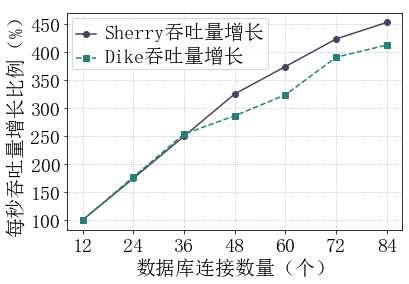

In [94]:
# x轴连接数量，y轴吞吐量，折线图，图例为不同工具
plt.figure()
plt.grid(linestyle = ":") #设置背景网格线为虚线

x = np.array([1, 2, 3, 4, 5, 6, 7])
x_label = np.array([12, 24, 36, 48, 60, 72, 84])
threads1_operations20_tps_norm = threads1_operations20_tps / threads1_operations20_tps[0] * 100
dike_30w_tps_norm = dike_30w_tps / dike_30w_tps[0] * 100
plt.plot(x, threads1_operations20_tps_norm, linestyle="-", color=color1, marker="o", label="Sherry吞吐量增长", linewidth=1.5)
plt.plot(x, dike_30w_tps_norm, linestyle="--", color=color2, marker="s", label="Dike吞吐量增长", linewidth=1.5)

plt.xticks(x, x_label, fontproperties=font)
plt.yticks(fontproperties=font)
plt.xlabel("数据库连接数量（个）", fontproperties=font)
plt.ylabel("每秒吞吐量增长比例（%）", fontproperties=font)

plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontproperties=font)

plt.savefig("../result/connection-tool-tps.pdf", bbox_inches="tight")
plt.show()

In [58]:
# 长时间运行能力
times = np.array([30, 60, 90, 120, 150])
disk_usage_sherry = np.array([16, 16, 16, 16, 16])
disk_usage_dike = np.array([96796, 206652, 320884, 436100, 539468])

analyze_time_sherry = np.array([2.881, 2.881, 2.881, 2.881, 2.881])
analyze_time_dike = np.array([10.221, 21.517, 35.583, 47.261, 61.619])

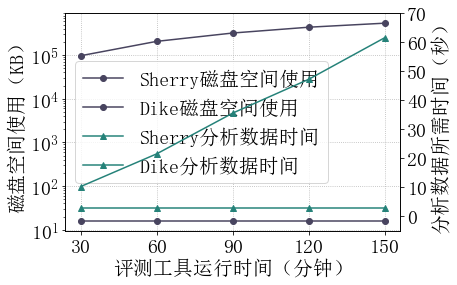

In [97]:

# x轴并发事务数量，y轴死锁检测时间/成功率，折线图，图例为不同指标
plt.figure()
plt.grid(linestyle = ":") #设置背景网格线为虚线
ax1 = plt.gca()

x = np.array([1, 2, 3, 4, 5])
x_label = np.array([30, 60, 90, 120, 150])
ax1.plot(x, disk_usage_sherry, label="Sherry磁盘空间使用", color=color1, marker="o", linewidth=1.5)
ax1.plot(x, disk_usage_dike, label="Dike磁盘空间使用", color=color1, marker="o", linewidth=1.5)
ax1.set_ylabel("磁盘空间使用（KB）", fontproperties=font)
ax1.set_xlabel("评测工具运行时间（分钟）", fontproperties=font)
ax1.set_yscale("log")
for label in ax1.get_yticklabels():
    label.set_fontproperties(font)
for label in ax1.get_xticklabels():
    label.set_font_properties(font)
    
ax2 = ax1.twinx()
ax2.plot(x, analyze_time_sherry, label="Sherry分析数据时间", color=color2, marker="^", linewidth=1.5)
ax2.plot(x, analyze_time_dike, label="Dike分析数据时间", color=color2, marker="^", linewidth=1.5)
ax2.set_ylabel("分析数据所需时间（秒）", fontproperties=font)
ax2.set_ylim(-5, 70)
for label in ax2.get_yticklabels():
    label.set_fontproperties(font)

plt.xticks(x, x_label, fontproperties=font)
line1, label1 = ax1.get_legend_handles_labels()
line2, label2 = ax2.get_legend_handles_labels()
ax1.legend(line1 + line2, label1 + label2, loc="center left", prop=font)

plt.savefig("../result/disk-time-tool.pdf", bbox_inches="tight")
plt.show()

In [99]:
# 分区缓存更新
# 不同更新频率对不同线程数的影响
intervals = np.array([1, 5, 10, 15, 20])
thread1_location_cache_ops = np.array([358872253, 372970093, 377845670, 391607771, 379152299]) / 300
thread5_location_cache_ops = np.array([142900484, 130703637, 152539654, 164174657, 132322373]) / 300
thread10_location_cache_ops = np.array([47821594, 52495032, 54007502, 56475040, 57035423]) / 300
thread15_location_cache_ops = np.array([42187365, 46163161, 46284141, 45950754, 46730744]) / 300
thread20_location_cache_ops = np.array([41217543, 44941071, 45306150, 45492782, 45608935]) / 300

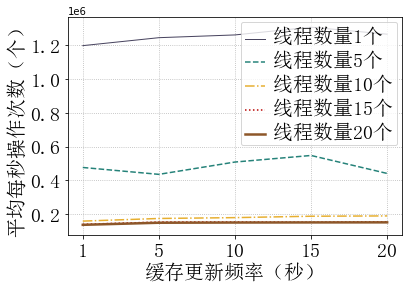

In [103]:
# x轴缓存更新频率，y轴，折线图，图例为网络延迟
plt.figure()
plt.grid(linestyle = ":") #设置背景网格线为虚线

x = np.array([1, 2, 3, 4, 5])
x_label = np.array([1, 5, 10, 15, 20])
plt.plot(x, thread1_location_cache_ops, linestyle="-", color=color1, label="线程数量1个", linewidth=1)
plt.plot(x, thread5_location_cache_ops, linestyle="--", color=color2, label="线程数量5个", linewidth=1.5)
plt.plot(x, thread10_location_cache_ops, linestyle="-.", color=color3, label="线程数量10个", linewidth=1.5)
plt.plot(x, thread15_location_cache_ops, linestyle=":", color=color4, label="线程数量15个", linewidth=1.5)
plt.plot(x, thread20_location_cache_ops, linestyle="-", color=color5, label="线程数量20个", linewidth=2.5)

plt.xticks(x, x_label, fontproperties=font)
plt.yticks(fontproperties=font)
plt.xlabel("缓存更新频率（秒）", fontproperties=font)
plt.ylabel("平均每秒操作次数（个）", fontproperties=font)

plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontproperties=font)

plt.savefig("../result/cache-ops-thread.pdf", bbox_inches="tight")
plt.show()